# Running EAZY Locally

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import eazy
from grizli.catalog import query_tap_catalog

# quiet numpy/astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning

np.seterr(all='ignore')
warnings.simplefilter('ignore', category=AstropyWarning)

### Symlink to EAZY templates

In [2]:
""" symlink to EAZY templates """
if not os.path.exists('templates'):
    eazy.symlink_eazy_inputs() 

## Get ZFOURGE Catalogs

In [3]:
# field = 'cdfs'
field = 'uds'

radec = {'cdfs':(53.0, -27.9), 
         'uds':(34.3, -5.3)}

# Vizier Table
# https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/zf_cdfs
db = f'"J/ApJ/830/51/zf_{field}"'

# Bright mag to limit catalog size
MAX_KMAG = 22.5

# Get table from Vizier
zf = query_tap_catalog(*radec[field], radius=60, db=db, vizier=True, 
                       extra=f" AND (zspec > 0 OR FKsall > {10**(-0.4*(MAX_KMAG-25))})", verbose=True)

print(f'\nFound {len(zf)} objects in {db}')

cat_name = f'zfourge.{field}.zspec.vizier.csv'
zf.write(cat_name, overwrite=True)

Query "J/ApJ/830/51/zf_uds" from VizieR TAP server
Launched query: 'SELECT TOP 1000000 * FROM "J/ApJ/830/51/zf_uds" WHERE RAJ2000 > 33.79785317074929 AND RAJ2000 < 34.8021468292507 AND DEJ2000 > -5.8 AND DEJ2000 < -4.8  AND (zspec > 0 OR FKsall > 10.0)'
------>http
host = tapvizier.u-strasbg.fr:80
context = /TAPVizieR/tap/sync
Content-type = application/x-www-form-urlencoded
200 200
[('date', 'Tue, 17 Oct 2023 01:09:10 GMT'), ('server', 'Apache/2.4.41 (Ubuntu) mod_jk/1.2.46 OpenSSL/1.1.1f'), ('vary', 'Accept-Encoding'), ('access-control-allow-origin', '*'), ('access-control-allow-credentials', 'true'), ('transfer-encoding', 'chunked'), ('content-type', 'application/x-votable+xml; serialization=TABLEDATA;charset=UTF-8')]
Retrieving sync. results...
Saving results to: sync_20231017110911.xml
Query finished.

Found 3207 objects in "J/ApJ/830/51/zf_uds"


# Parameters and Translation Files

In [4]:
# Predefined translate file
trans_name = f'zfourge.{field}.vizier.translate.csv'
csv_trans = pd.read_csv(f'https://erda.ku.dk/vgrid/Gabriel%20Brammer/Catalogs/{trans_name}')
csv_trans.to_csv(trans_name, index=False)

# New parameters
params = {}
params['MW_EBV'] = eazy.utils.get_irsa_dust(np.nanmedian(zf['ra']), np.nanmedian(zf['dec']))

params['CATALOG_FILE'] = cat_name
params['PRIOR_ABZP'] = 25
params['CATALOG_FORMAT'] = 'csv'
params['PRIOR_FILTER'] = 255
#params['TEMPLATES_FILE'] = 'templates/spline_templates_v2/tweak_spline.param'
params['MAIN_OUTPUT_FILE'] = f'zfourge.{field}'

params['SYS_ERR'] = 0.03

params['Z_MAX'] = 12.
params['Z_STEP'] = 0.005

translate_file = trans_name

C:\Users\n10480129\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


## Initialise PhotoZ Object

In [5]:
self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None, 
                          params=params, load_prior=True, load_products=False)

Read default param file: C:\Users\n10480129\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\eazy\data/zphot.param.default
Read CATALOG_FILE: zfourge.uds.zspec.vizier.csv
   >>> NOBJ = 3207
F8_0 e_F8_0 ( 21): IRAC/irac_tr4_2004-08-09.dat
F5_8 e_F5_8 ( 20): IRAC/irac_tr3_2004-08-09.dat
F4_5 e_F4_5 ( 19): IRAC/irac_tr2_2004-08-09.dat
F3_6 e_F3_6 ( 18): IRAC/irac_tr1_2004-08-09.dat
FKs e_FKs (255): FOURSTAR/Ks_cam_optics_sky.txt
FKsHI e_FKsHI (269): VLT/hawki_k_ETC.dat
FJ1 e_FJ1 (249): FOURSTAR/J1_cam_optics_sky.txt
FJ2 e_FJ2 (250): FOURSTAR/J2_cam_optics_sky.txt
FJ3 e_FJ3 (251): FOURSTAR/J3_cam_optics_sky.txt
FHs e_FHs (254): FOURSTAR/Hshort_cam_optics_sky.txt
FHl e_FHl (253): FOURSTAR/Hlong_cam_optics_sky.txt
Fu e_Fu ( 88): megaprime/cfht_mega_u_cfh9301.dat
FB e_FB (122): UKIDSS/B_qe.txt
FV e_FV ( 79): COSMOS/SUBARU_filter_V.txt
FR e_FR (123): UKIDSS/R_qe.txt
Fi e_Fi (124): UKIDSS/i_qe.txt
Fz e_Fz (125): UKIDSS/z

100%|██████████| 12/12 [00:13<00:00,  1.16s/it]


Template   0: tweak_fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: tweak_fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: tweak_fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: tweak_fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: tweak_fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: tweak_fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: tweak_fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: tweak_fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: tweak_fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: tweak_fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: tweak_fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: tweak_fsps_QSF_12_v3_012.dat (NZ=1).
Process templates: 14.683 s


511it [00:00, 932.59it/s]


## Iterative Zero Point Corrections

Iteration:  0


100%|██████████| 511/511 [00:34<00:00, 14.86it/s]


Compute best fits
fit_best: 0.4 s (n_proc=1,  NOBJ=3111)
Fit 35.3 s (n_proc=8, NOBJ=3203)
Iterative correction - zeropoint / template
Iteration:  1


100%|██████████| 511/511 [00:31<00:00, 16.27it/s]


Compute best fits
fit_best: 0.4 s (n_proc=1,  NOBJ=3114)
Fit 32.4 s (n_proc=8, NOBJ=3203)
Iterative correction - zeropoint / template
Iteration:  2


100%|██████████| 511/511 [00:30<00:00, 16.90it/s]


Compute best fits
fit_best: 0.4 s (n_proc=1,  NOBJ=3114)
Fit 31.1 s (n_proc=8, NOBJ=3203)
Iterative correction - zeropoint / template


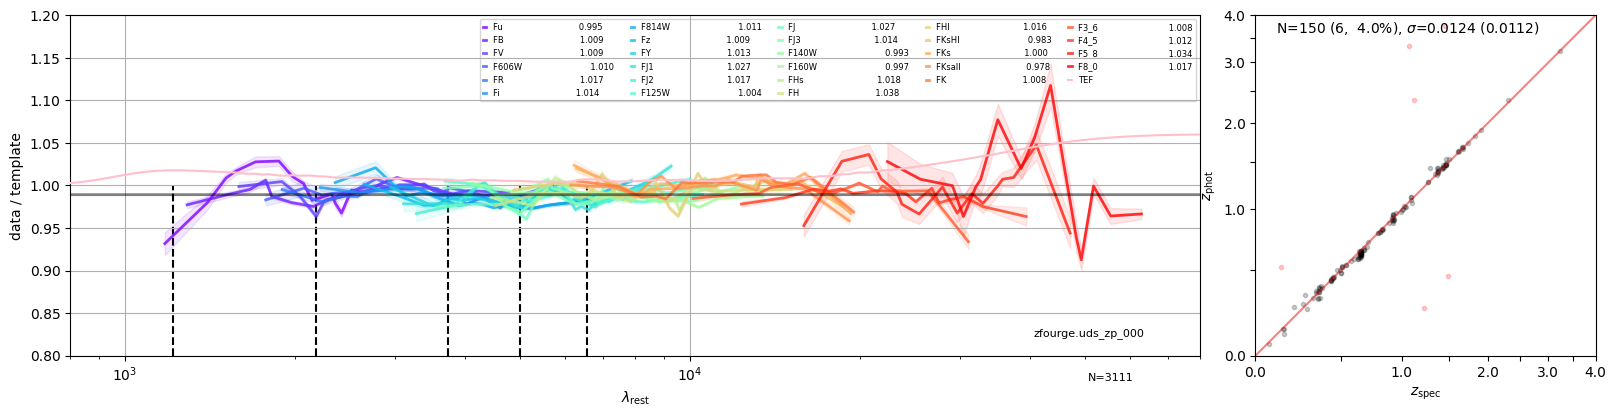

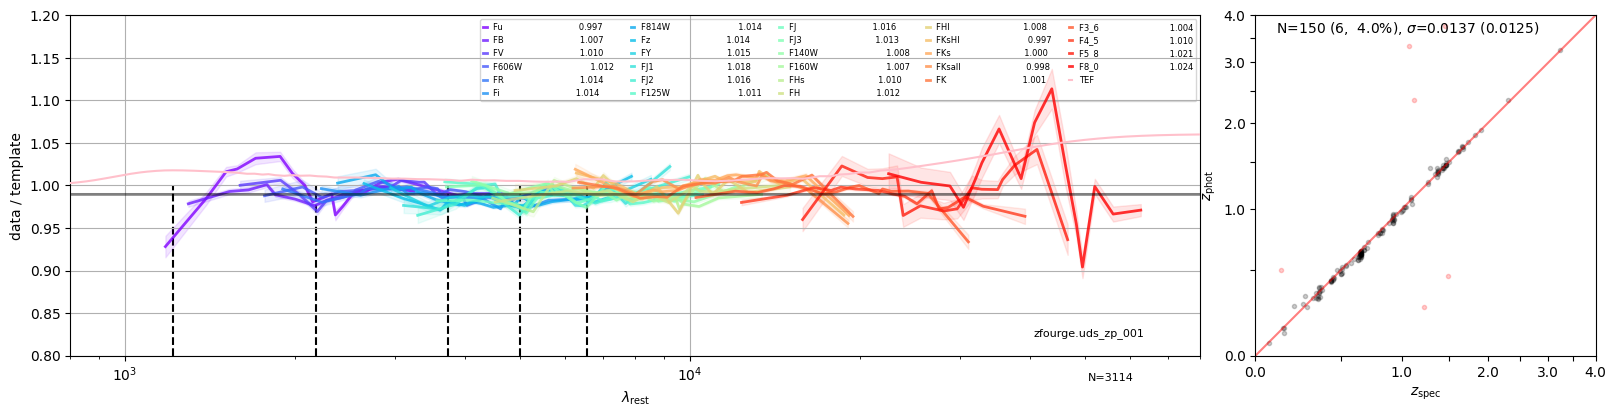

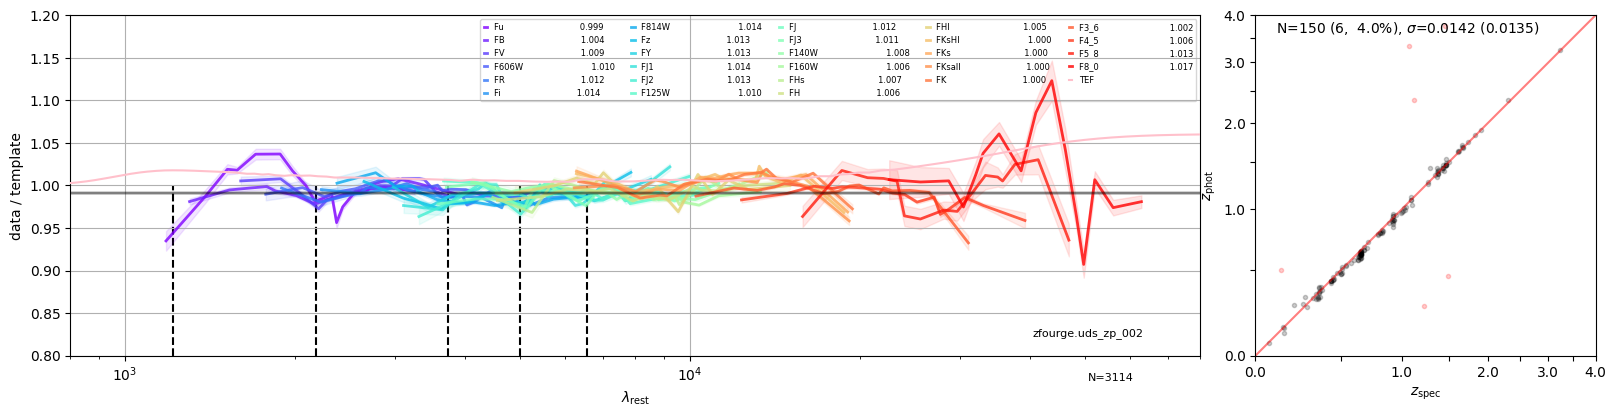

In [6]:
NITER = 3
NBIN = np.minimum(self.NOBJ//100, 180)

self.param.params['VERBOSITY'] = 1.
for iter in range(NITER):
    print('Iteration: ', iter)
    
    sn = self.fnu/self.efnu
    clip = (sn > 1).sum(axis=1) > 4 # Generally make this higher to ensure reasonable fits
    self.iterate_zp_templates(idx=self.idx[clip], update_templates=False, 
                              update_zeropoints=True, iter=iter, n_proc=8, 
                              save_templates=False, error_residuals=False, 
                              NBIN=NBIN, get_spatial_offset=False)

## Fit Whole Catalog

In [7]:
# Turn off error corrections derived above
self.set_sys_err(positive=True)

# Full catalog
sample = np.isfinite(self.ZSPEC)

# fit_parallel renamed to fit_catalog 14 May 2021
self.fit_catalog(self.idx[sample], n_proc=8)

Set sys_err = 0.03 (positive=True)


100%|██████████| 511/511 [00:29<00:00, 17.47it/s]


Compute best fits
fit_best: 0.4 s (n_proc=1,  NOBJ=3113)
Fit 30.1 s (n_proc=8, NOBJ=3207)


## Show Photometric and Spectroscopic Redshift Comparison

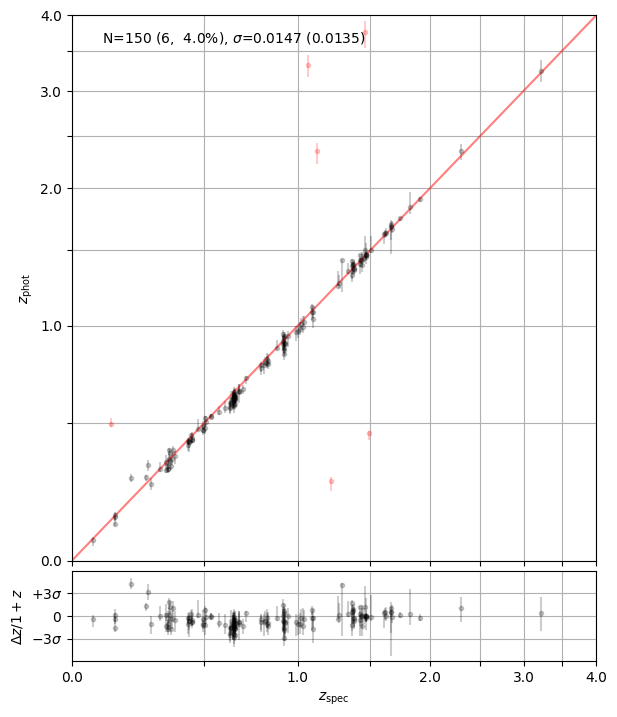

In [8]:
fig = self.zphot_zspec()

## Write Output .fits

In [9]:
# Derived parameters (z params, RF colors, masses, SFR, etc.)
warnings.simplefilter('ignore', category=RuntimeWarning)
zout, hdu = self.standard_output(simple=False, 
                                 rf_pad_width=0.5, rf_max_err=2, 
                                 prior=True, beta_prior=True, 
                                 absmag_filters=[], 
                                 extra_rf_filters=[])

Get best fit coeffs & best redshifts
fit_best: 1.8 s (n_proc=1,  NOBJ=3117)
Get parameters (UBVJ=[153, 154, 155, 161], simple=False)


100%|██████████| 3117/3117 [00:14<00:00, 213.73it/s]


## UV vs UJ Plot

Text(0, 0.5, '$(U-V)_0$')

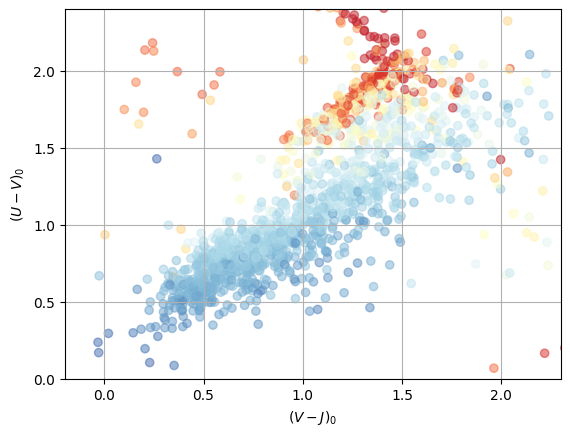

In [10]:
# Show UVJ diagram
uv = -2.5*np.log10(zout['restU']/zout['restV'])
vj = -2.5*np.log10(zout['restV']/zout['restJ'])
ssfr = zout['sfr']/zout['mass']

sel = (zout['z_phot'] > 0.2) & (zout['z_phot'] < 1)
plt.scatter(vj[sel], uv[sel], c=np.log10(ssfr)[sel], 
            vmin=-13, vmax=-8, alpha=0.5, cmap='RdYlBu')

plt.xlim(-0.2, 2.3); plt.ylim(0, 2.4); plt.grid()
plt.xlabel(r'$(V-J)_0$'); plt.ylabel(r'$(U-V)_0$')  

# SED Stuff?

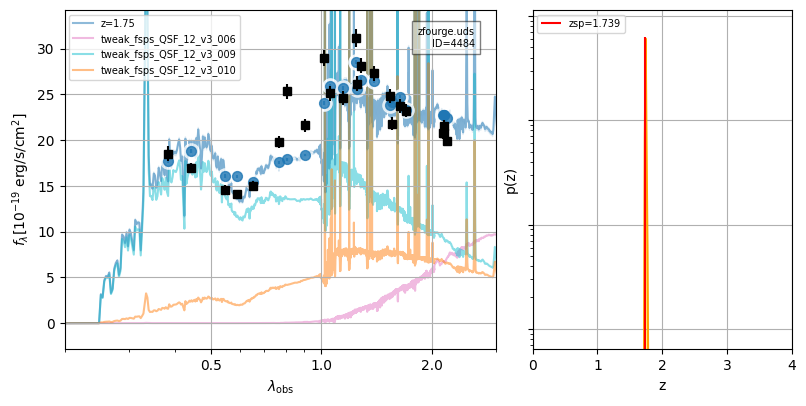

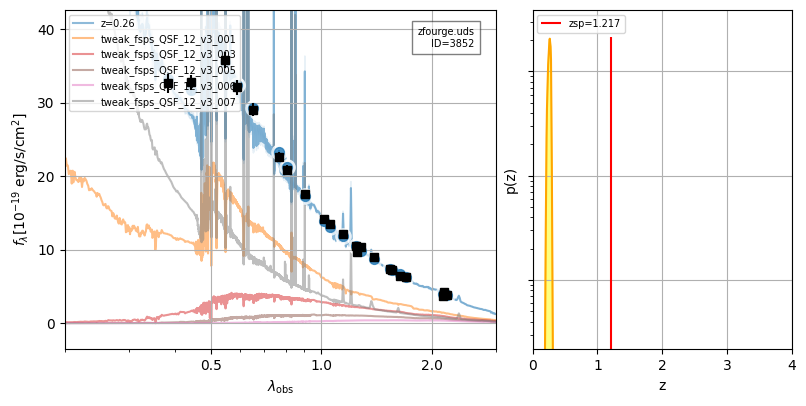

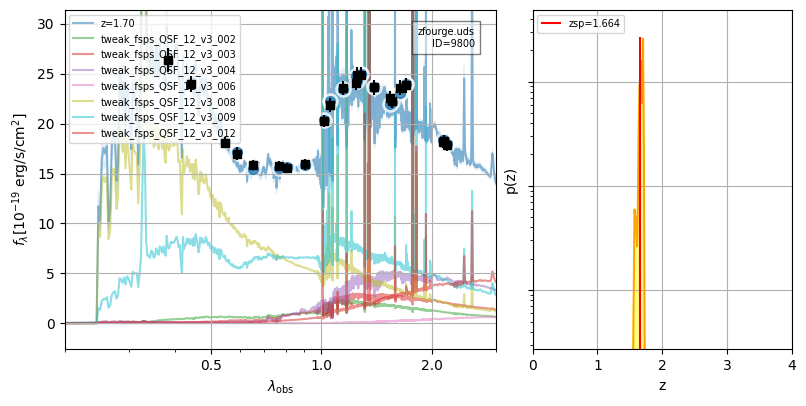

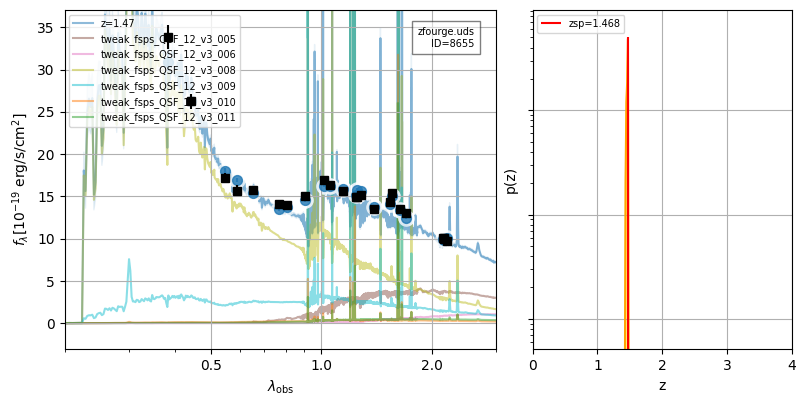

In [11]:
# Show brightest objects with z_spec > 1

ifilter = self.flux_columns[np.argmin((self.lc - 8140)**2)]

imag = params['PRIOR_ABZP'] - 2.5*np.log10(self.cat[ifilter])
sel = (self.ZSPEC > 1.1)

so = np.argsort(imag[sel])
ids = self.OBJID[sel][so]

for i in range(4):
    fig, data = self.show_fit(ids[i], xlim=[0.2, 3], show_components=True,
                              logpz=True, zr=[0,4])

## Some Plots of Spectroscopic Redshift?

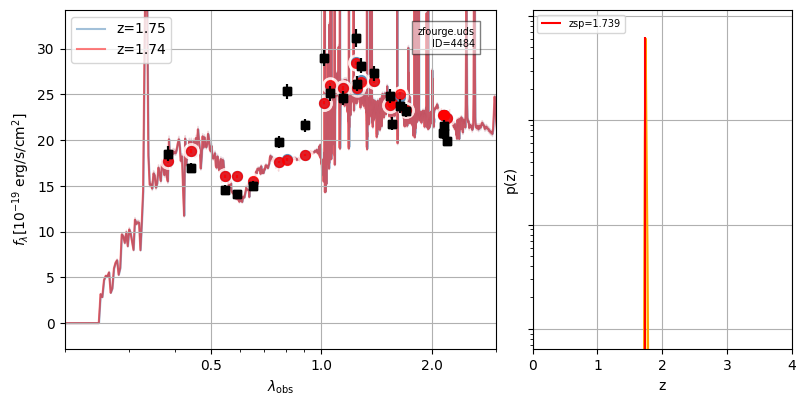

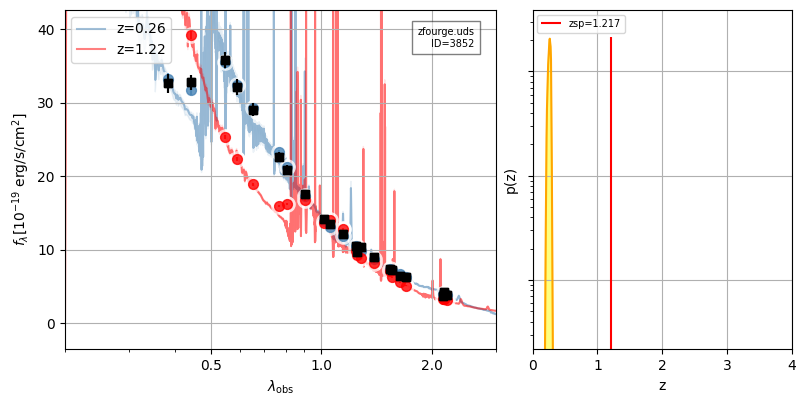

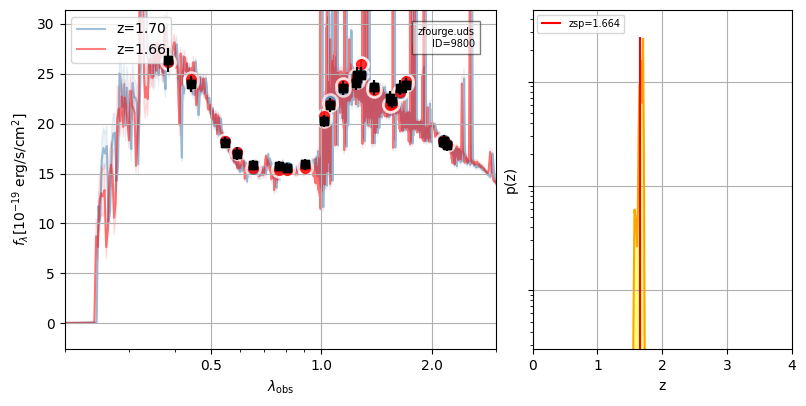

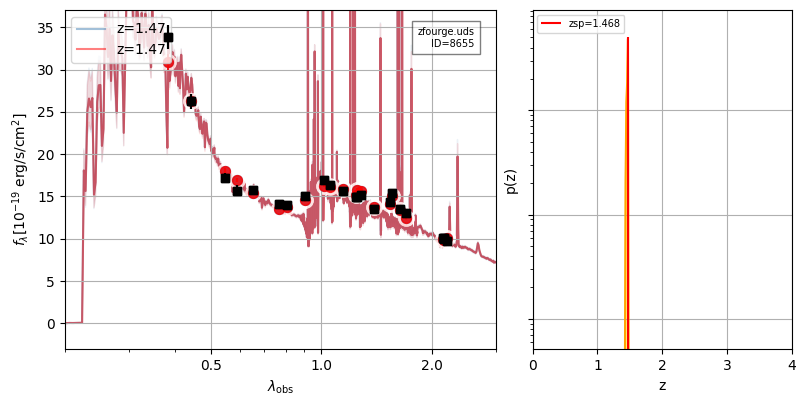

In [12]:
# Compare forced fit at z_spec
for i in range(4):
    ix = np.where(self.OBJID == ids[i])[0][0]
    fig, data = self.show_fit(ids[i], xlim=[0.2, 3], 
                        show_components=False,
                        template_color='steelblue', logpz=True, zr=[0,4])

    # Now show with z_spec
    axes = fig.axes[:1]
    res = self.show_fit(ids[i], xlim=[0.2, 3], axes=axes,
                        zshow=self.ZSPEC[ix], 
                        show_components=False,
                        template_color='r')

    axes[0].legend(loc='upper left')

## Bandpass Throughput

416
416
hst/wfc3/IR/f160w.dat lambda_c= 1.5396e+04 AB-Vega= 1.250 w95=2743.9


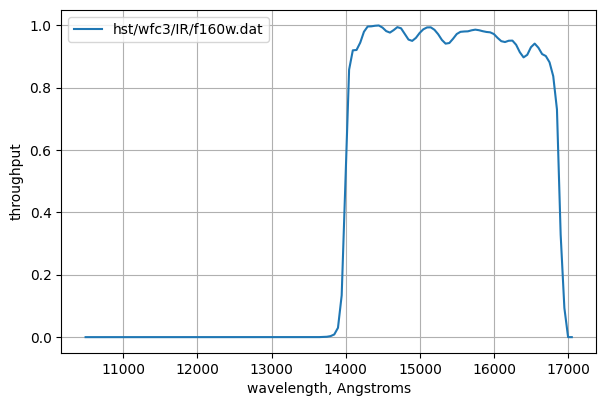

In [13]:
from eazy.filters import FilterFile

res = FilterFile('FILTER.RES.latest')
print(len(res.filters))
print(res.NFILT)

bp = res[205]
print(bp)

fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(bp.wave, bp.throughput, label=bp.name.split()[0])

ax.set_xlabel('wavelength, Angstroms')
ax.set_ylabel('throughput')
ax.legend()
ax.grid()

fig.tight_layout(pad=0.5)


## Reddening

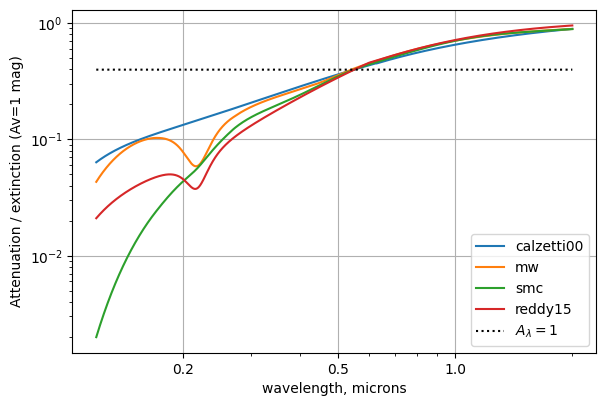

In [14]:
from eazy.templates import Redden

fig, ax = plt.subplots(1,1,figsize=(6,4))

wave = np.arange(1200, 2.e4)

for model in ['calzetti00', 'mw', 'smc', 'reddy15']:
    redfunc = Redden(model=model, Av=1.0)
    ax.plot(wave, redfunc(wave), label=model)

ax.plot(wave, wave*0+10**(-0.4), color='k', 
          label=r'$A_\lambda = 1$', linestyle=':')

ax.legend()
ax.loglog()

ax.set_xticks([2000, 5000, 1.e4])
ax.set_xticklabels([0.2, 0.5, 1.0])

ax.grid()
ax.set_xlabel('wavelength, microns')
ax.set_ylabel('Attenuation / extinction (Av=1 mag)')

fig.tight_layout(pad=0.5)